# Data

In [1]:
import pandas as pd
df = pd.read_excel('Impact of Leadership on GPA.xlsx', sheet_name='Sheet2')

In [2]:
df['Leaders'] = ['Non-Leader' if i=='None' else 'Leader' for i in df['What leadership positions have you held? Check all that apply.']]
df = df.drop(['What leadership positions have you held? Check all that apply.'], axis=1)

In [3]:
# Target Variable
df['Target']=df[['Do you have a post-grad, full-time job?','Do you have a post-grad, full-time job?3',
    'Did/do you have an internship?','Did/do you have an internship?2']].sum(axis=1)
df['Target'] = df['Target'].astype('category')

df = df.drop(['Do you have a post-grad, full-time job?','Do you have a post-grad, full-time job?3',
    'Did/do you have an internship?','Did/do you have an internship?2','Define "other" if selected previously',
              'What is your expected degree in?'], axis=1)

In [4]:
# Which ones are categorical/numeric?
num= ['Semester GPA BEFORE holding one of your leadership positions',
       'Semester GPA AFTER holding that same leadership position', 'Current Cumulative GPA', 
      'On a 1-5 scale, how successful did your leadership position make you feel as a student after holding your position?']

cat = [i for i in df.columns if i not in num]

df[cat] = df[cat].astype('category')
df[num] =  df[num].astype('float64')

In [5]:
cat

['Grade',
 'Gender',
 'Business School vs Arts&Science',
 'How many hours do you study per week?',
 'Held position',
 'Do you think you have a better chance at an internship/job if you have a leadership position on your resume?',
 'Did you feel successful at Bryant without a leadership position?',
 'Do you think you have a better chance at an internship/job if you have a leadership position on your resume?2',
 'Leaders',
 'Target']

# Visualization

In [6]:
df['Target'] = df['Target'].cat.rename_categories(['None','Job or Internship','Both'])
# df['Target'] = df['Target'].cat.rename_categories([0,1,2])

<Figure size 432x288 with 0 Axes>

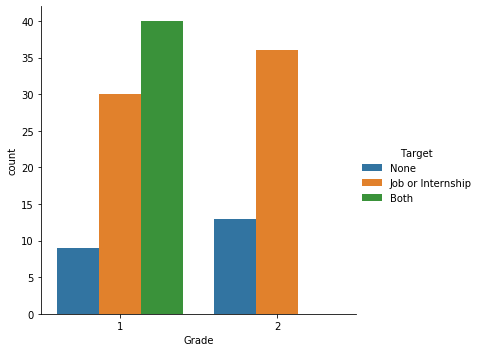

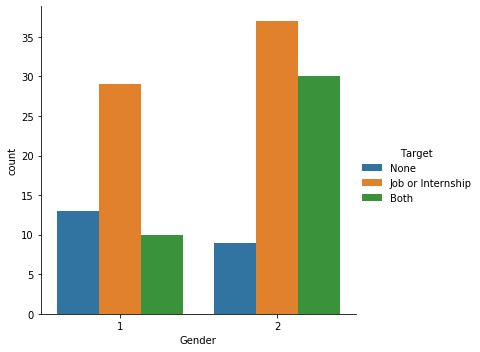

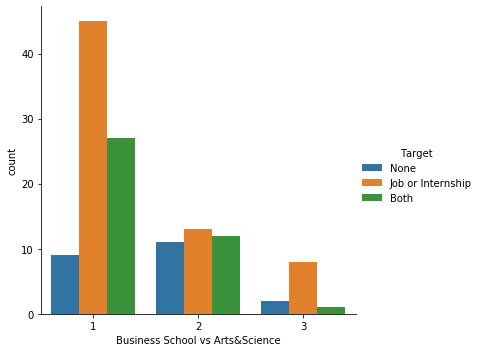

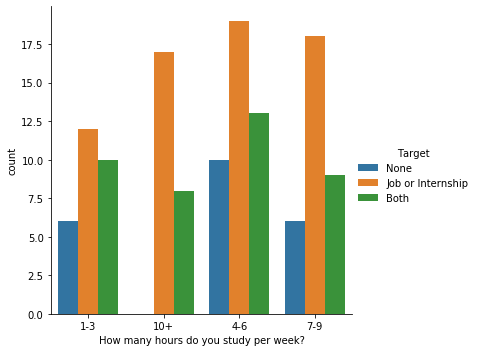

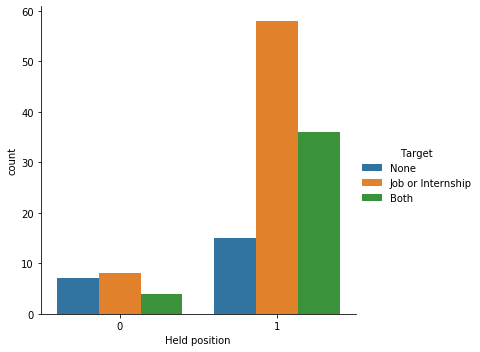

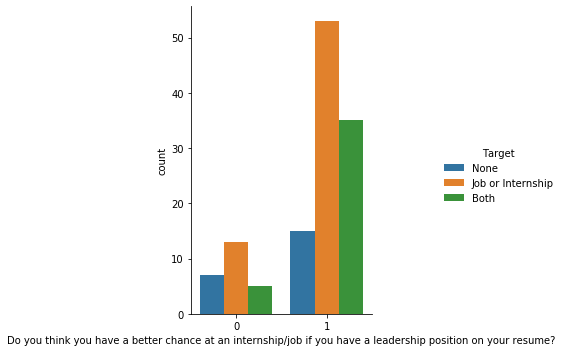

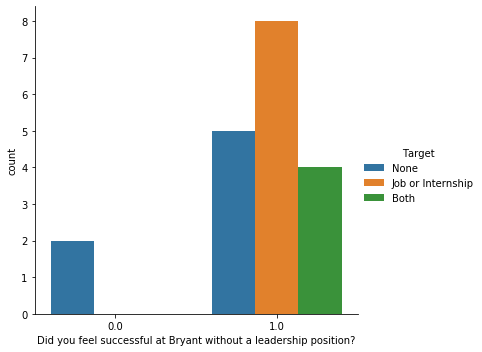

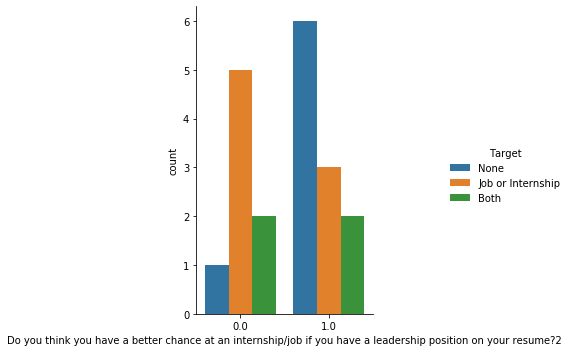

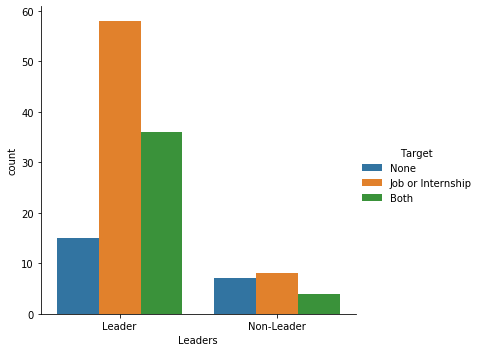

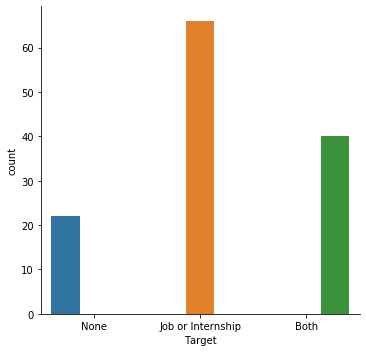

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


for i, col in enumerate(cat):
    plt.figure(i)
    sns_plot = sns.catplot(col, hue="Target", data=df, kind='count')
    sns_plot.savefig('Target'+str(i) + ".png")

<Figure size 432x288 with 0 Axes>

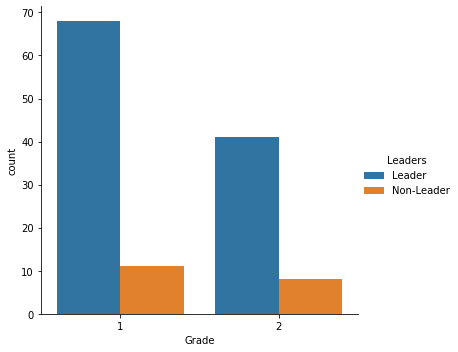

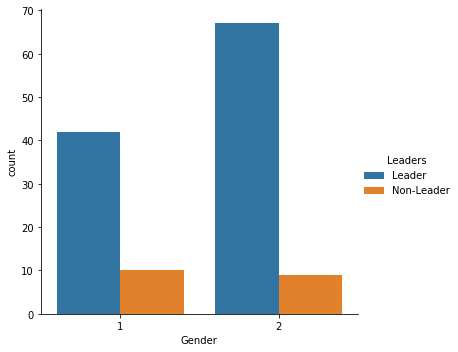

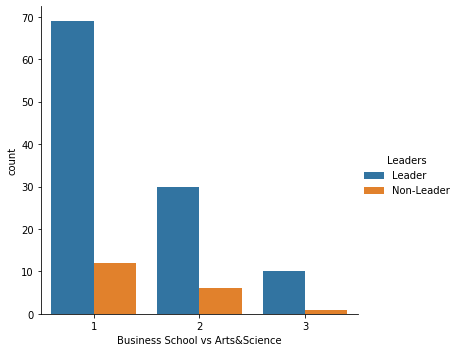

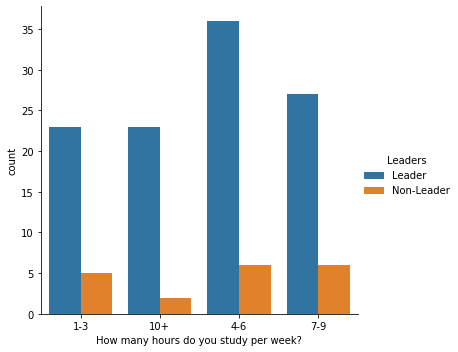

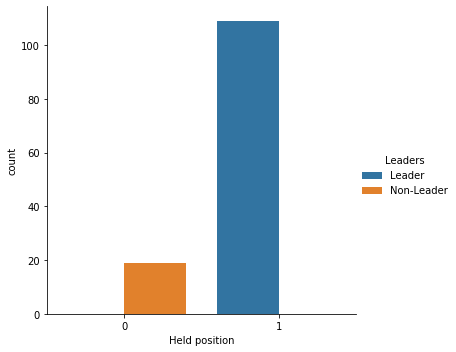

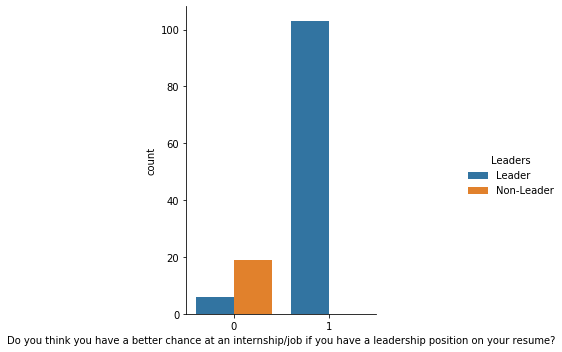

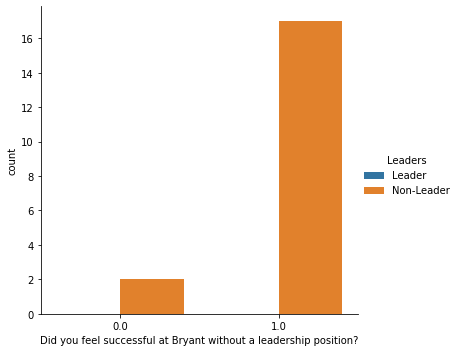

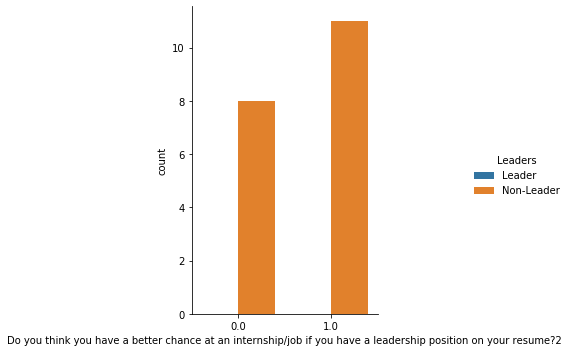

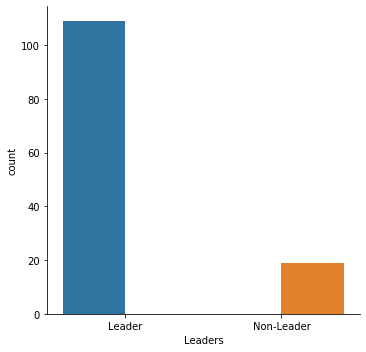

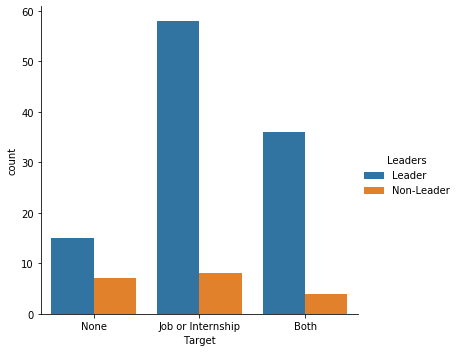

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


for i, col in enumerate(cat):
    plt.figure(i)
    sns_plot = sns.catplot(col, hue="Leaders", data=df, kind='count')
    sns_plot.savefig('Leaders'+str(i) + ".png")

AttributeError: 'Figure' object has no attribute 'saveplot'

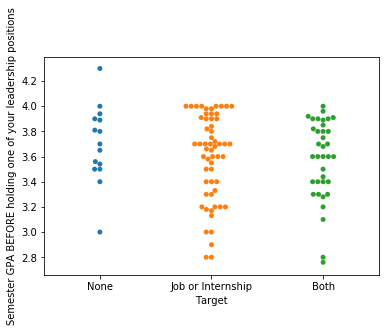

In [13]:
for i, col in enumerate(num):
    plt.figure(i)
    sns_plot = sns.swarmplot(x='Target', y=col, data=df)
    sns_plot.figure.saveplot('Target_Numeric'+str(i)+'.png')